In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon, t, probplot
import scipy.stats as st
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_process import ArmaProcess

In [6]:
np.abs(np.roots([0.1, -0.5, 0.5, 1]))

array([3.25642854, 3.25642854, 0.9430113 ])

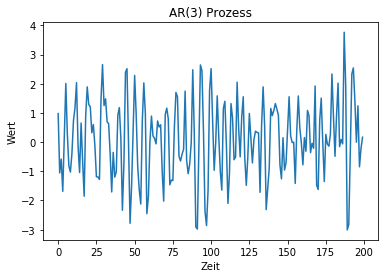

In [7]:
ar1 = np.array([1, -.5, .5, .1])
simulated_data = ArmaProcess(ar1, ma=[1]).generate_sample(nsample=200)
plt.plot(simulated_data)
plt.xlabel("Zeit")
plt.ylabel("Wert")
plt.title("AR(3) Prozess")
plt.show()

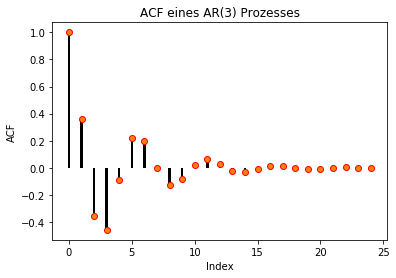

In [27]:
lag = 25
acf_theor =ArmaProcess(ar = [1, -.5, .5, .1], ma=[1]).acf(lag)
x = np.arange(lag)
plt.bar(x, acf_theor , width=.2, color="black")
plt.plot(x, acf_theor, "ro", markerfacecolor="C1")
plt.xlabel("Index")
plt.ylabel("ACF")
plt.title("ACF eines AR(3) Prozesses")
plt.show()

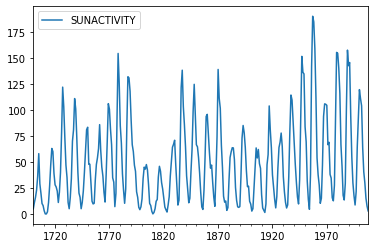

In [30]:
import statsmodels.api as sm
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot()
plt.show()

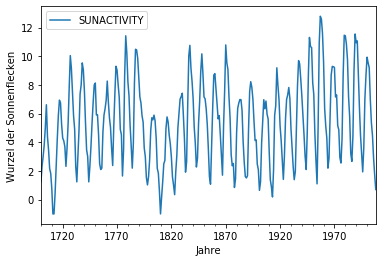

In [31]:
dta_sq = (np.sqrt(dta) - 1)
dta_sq.plot()
plt.xlabel("Jahre")
plt.ylabel("Wurzel der Sonnenflecken")
plt.show()

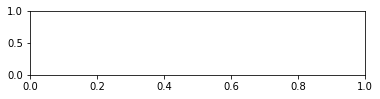

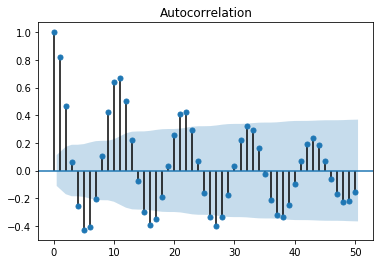

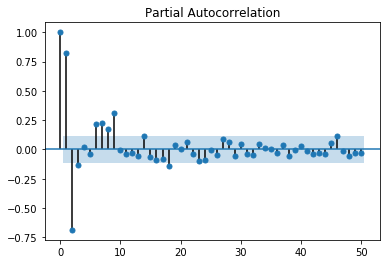

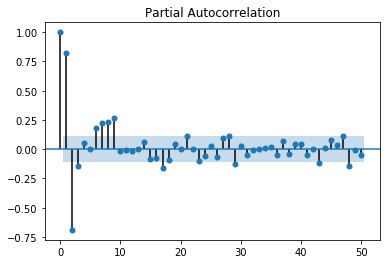

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig = plt.figure()
ax1 = fig.add_subplot(311)
plot_acf(dta_sq,lags=50)
plot_pacf(dta_sq,lags=50)
plot_pacf(dta,lags=50)
plt.show()

In [37]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(dta_sq, order=(9,0)).fit()

C:\Users\flori\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


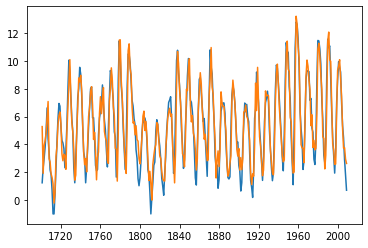

In [38]:
plt.plot(dta_sq)
plt.plot(dta_sq["SUNACTIVITY"] - model.resid)
plt.show()

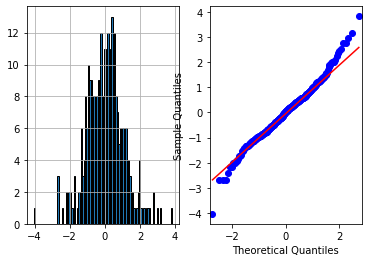

In [41]:
from statsmodels.graphics.api import qqplot
fig = plt.figure()
ax1 = fig.add_subplot(121)
model.resid.hist(edgecolor="black", bins=100, ax=ax1)
ax2 = fig.add_subplot(122)
qqplot(model.resid, line="q", ax=ax2)
plt.show()

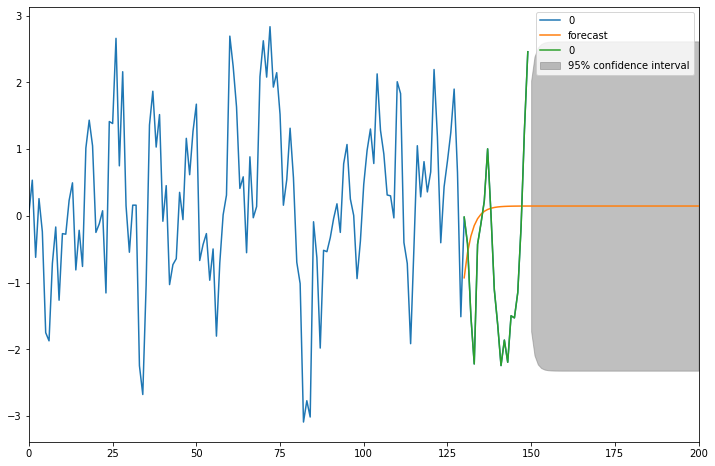

In [46]:
from pandas import DataFrame
np.random.seed(4)
ar1 = np.array([1, -.7])
sim = DataFrame(ArmaProcess(ar1, ma=[1]).generate_sample(nsample=150))
mod = ARMA(sim, order=(1,0)).fit()
fig, ax = plt.subplots(figsize=(12, 8))
ax = sim.loc[0:].plot(ax=ax)
fig = mod.plot_predict(130, 200, dynamic=True, ax=ax, plot_insample=True)
plt.show()

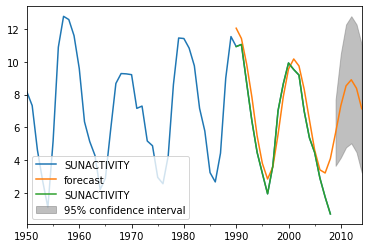

In [44]:
fig, ax = plt.subplots()
ax = dta_sq.loc['1950':].plot(ax=ax)
fig = model.plot_predict('1990', '2014', dynamic=True, ax=ax, plot_insample=True)
plt.show()